<a href="https://colab.research.google.com/github/Milafreire/WoMakersCode_DataAnalyst/blob/main/Consumidor_CamilaBarros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Desafio 1: Entendendo o consumidor.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling

In [ ]:
dados = pd.read_csv("desafio-01-consumidor.csv")

In [ ]:
dados.head()

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1


## Primeiramente será feita uma análise para verificar quais dados são pré-pandemia e quais não são. Os dados serão armazenados em listas. Sendo cada lista referente a uma coluna do DataFrame

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_cliente    203 non-null    object
 1   idade         203 non-null    int64 
 2   renda         203 non-null    int64 
 3   produto       203 non-null    object
 4   regiao-BR     203 non-null    object
 5   pre-pandemia  203 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 9.6+ KB


In [ ]:
produtos_pre_pandemia = []
regiao_pre_pandemia = []
renda_pre_pandemia = []
idade_pre_pandemia = []

produtos_nao_pre_pandemia = []
regiao_nao_pre_pandemia = []
renda_nao_pre_pandemia = []
idade_nao_pre_pandemia = []

In [ ]:
for i in range(len(dados['pre-pandemia'])):
    if(dados['pre-pandemia'][i] == 1):
        produtos_pre_pandemia.append(dados['produto'][i])
        regiao_pre_pandemia.append(dados['regiao-BR'][i])
        renda_pre_pandemia.append(dados['renda'][i])
        idade_pre_pandemia.append(dados['idade'][i])
    else:
        produtos_nao_pre_pandemia.append(dados['produto'][i])
        regiao_nao_pre_pandemia.append(dados['regiao-BR'][i])
        renda_nao_pre_pandemia.append(dados['renda'][i])
        idade_nao_pre_pandemia.append(dados['idade'][i])

# Desenvolvimento dos DataFrames pré-pandemia e nao pré-pandemia

In [ ]:
dados_pre_pandemia = pd.DataFrame({'Idade':idade_pre_pandemia, 'Renda':renda_pre_pandemia,'Regiao':regiao_pre_pandemia})
dados_produtos_pre_pandemia = pd.DataFrame({'Produto':produtos_pre_pandemia})

dados_nao_pre_pandemia = pd.DataFrame({'Idade':idade_nao_pre_pandemia, 'Renda':renda_nao_pre_pandemia,'Regiao':regiao_nao_pre_pandemia})
dados_produtos_nao_pre_pandemia = pd.DataFrame({'Produto':produtos_nao_pre_pandemia})

In [ ]:
dados['pre-pandemia'].value_counts()

0    102
1    101
Name: pre-pandemia, dtype: int64

# Plotando gráfico para análise da região da venda dos produtos pré-pandemia

In [ ]:
frequencia_pre_pandemia = dados_pre_pandemia['Regiao'].value_counts()
percentual_pre_pandemia = dados_pre_pandemia['Regiao'].value_counts(normalize = True) * 100
dist_freq_pre_pandemia = pd.DataFrame({'Frequência': frequencia_pre_pandemia, 'Porcentagem (%)': percentual_pre_pandemia})
dist_freq_pre_pandemia


,Frequência,Porcentagem (%)
Sul,29,28.712871
Nordeste,26,25.742574
Sudeste,21,20.792079
Centro-Oeste,17,16.831683
Norte,8,7.920792


In [ ]:
dist_freq_pre_pandemia['Frequência'].plot.bar(color = 'red', alpha = 0.4, figsize=(12, 6))

In [ ]:
# Plotando gráfico para análise dos produtos vendidos na pré-pandemia

In [ ]:
frequencia_pre_pandemia_produtos = dados_produtos_pre_pandemia['Produto'].value_counts()
percentual_pre_pandemia_produtos = dados_produtos_pre_pandemia['Produto'].value_counts(normalize = True) * 100
dist_freq_pre_pandemia_produtos = pd.DataFrame({'Frequência': frequencia_pre_pandemia_produtos, 'Porcentagem (%)': percentual_pre_pandemia_produtos})
dist_freq_pre_pandemia_produtos

,Frequência,Porcentagem (%)
batom,61,60.396040
desodorante,20,19.801980
antissinais,9,8.910891
sombra,4,3.960396
perfume,4,3.960396
base,3,2.970297


In [ ]:
dist_freq_pre_pandemia_produtos['Frequência'].plot.bar(color = 'green', alpha = 0.4, figsize=(12, 6))

## Faixa etária da idade dos clientes pré-pandemia

In [ ]:
print('De %s até %s anos' % (dados_pre_pandemia['Idade'].min(), dados_pre_pandemia['Idade'].max()))

De 16 até 80 anos


# Gráfico da idade dos clientes pré-pandemia

In [ ]:
ay = sns.histplot(dados_pre_pandemia['Idade'], kde = True, bins=50, color='navy')
ay.figure.set_size_inches(12, 6)
ay.set_title('Distribuição de Frequências - Anos', fontsize=18)
ay.set_xlabel('Anos', fontsize=14)
ay

In [ ]:
## Faixa da renda dos clientes pré-pandemia

In [ ]:
print('De R$:%s,00 até R$:%s,00' % (dados_pre_pandemia['Renda'].min(), dados_pre_pandemia['Renda'].max()))

De R$:110,00 até R$:24090,00


In [ ]:
aw = sns.histplot(dados_pre_pandemia['Renda'], kde = True, bins=50, color='darkmagenta')
aw.figure.set_size_inches(12, 6)
aw.set_title('Distribuição de Frequências - Reais', fontsize=18)
aw.set_xlabel('Reais', fontsize=14)
aw

Text(0.5, 1.0, 'Histograama comparativo')

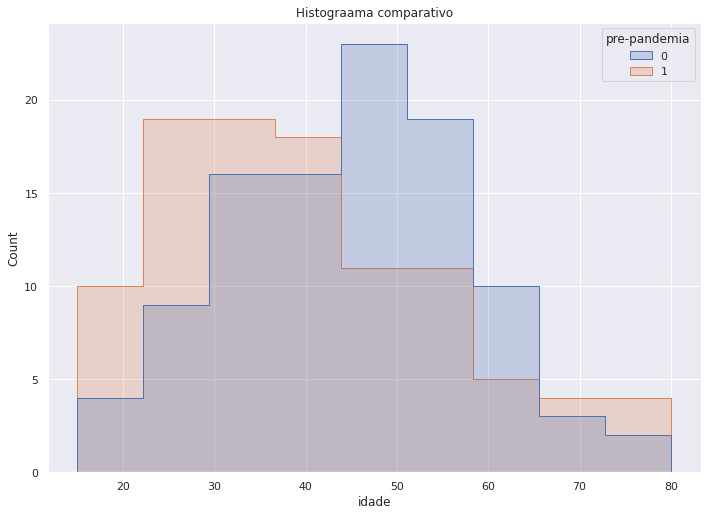

In [ ]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.histplot(data=dados, x="idade", hue="pre-pandemia", element="step").set_title("Histograama comparativo")
## 0 = pre-pandemia
## 1 = pós-pandemia

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


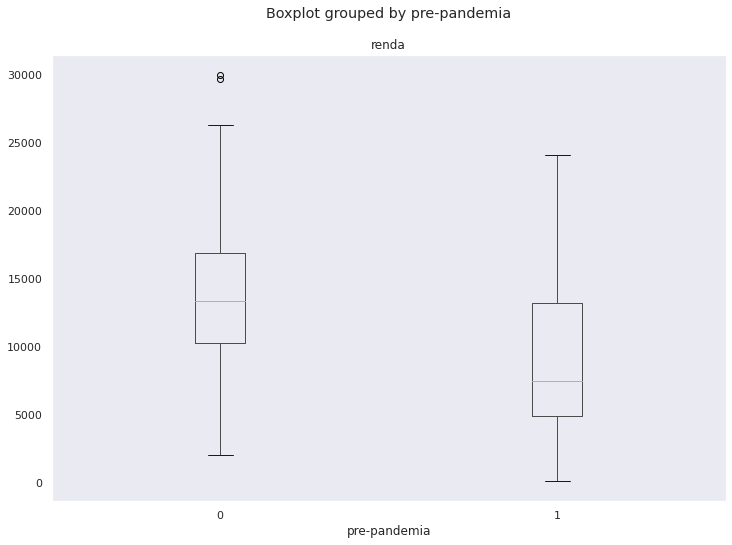

In [ ]:
dados.boxplot(by ='pre-pandemia', column =['renda'], grid = False)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


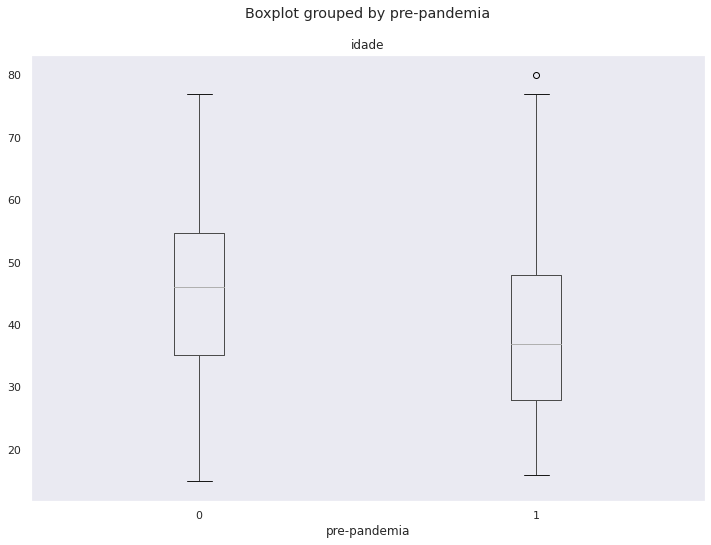

In [ ]:
dados.boxplot(by ='pre-pandemia', column =['idade'], grid = False)

In [ ]:
frequencia = dados['pre-pandemia'].value_counts()
percentual = dados['pre-pandemia'].value_counts(normalize = True) * 100
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
dist_freq_qualitativas.rename_axis('Período', axis = 'columns', inplace = True)


In [ ]:
dist_freq_qualitativas.rename(index = {0: 'Pré-Pandemia', 1: 'Pós-Pandemia'})

Período,Frequência,Porcentagem (%)
Pré-Pandemia,102,50.246305
Pós-Pandemia,101,49.753695


In [ ]:
 pd.crosstab(dados['produto'],dados['pre-pandemia'])

pre-pandemia,0,1
produto,,
antissinais,20,9
base,4,3
batom,15,61
desodorante,46,20
perfume,8,4
sombra,9,4


In [ ]:
 pd.crosstab(dados['produto'],dados['regiao-BR'])

regiao-BR,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
produto,,,,,
antissinais,9,3,17,0,0
base,3,4,0,0,0
batom,0,11,0,35,30
desodorante,5,16,0,4,41
perfume,4,8,0,0,0
sombra,4,9,0,0,0


In [ ]:
dados.idade.min()
dados.idade.max()
classes = [0, 21, 35, 42, 55, 80]
labels = ['Adolescente', 'Jovem', 'Adulto', 'Maduro', 'Terceira-Idade']

In [ ]:
percentual = pd.value_counts(
    pd.cut(x = dados.idade,
               bins = classes,
               labels = labels,
               include_lowest = True),
    normalize = True
)
percentual

Jovem             0.295567
Maduro            0.285714
Terceira-Idade    0.201970
Adulto            0.167488
Adolescente       0.049261
Name: idade, dtype: float64

In [ ]:
pd.cut(x = dados.idade,
       bins = classes,
       labels = labels,
       include_lowest = True)

0               Jovem
1      Terceira-Idade
2               Jovem
3               Jovem
4               Jovem
            ...      
198            Maduro
199            Maduro
200            Maduro
201            Maduro
202    Terceira-Idade
Name: idade, Length: 203, dtype: category
Categories (5, object): ['Adolescente' < 'Jovem' < 'Adulto' < 'Maduro' < 'Terceira-Idade']

In [ ]:
dados.renda.max()
dados.renda.min()
classes = [0, 2090, 4180, 10450, 20900, 30000]
labels = ['E', 'D', 'C', 'B', 'A']
pd.cut(x = dados.renda,
       bins = classes,
       labels = labels,
       include_lowest = True)

0      C
1      E
2      D
3      C
4      E
      ..
198    B
199    B
200    C
201    B
202    B
Name: renda, Length: 203, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [ ]:
percentual = pd.value_counts(
    pd.cut(x = dados.renda,
               bins = classes,
               labels = labels,
               include_lowest = True),
    normalize = True
) 
percentual

B    0.467980
C    0.320197
D    0.088670
A    0.083744
E    0.039409
Name: renda, dtype: float64

In [ ]:
dados[['idade', 'renda']].describe()

,idade,renda
count,203.000000,203.000000
mean,42.403941,11586.364532
std,14.400715,6288.016708
min,15.000000,110.000000
25%,31.000000,6705.000000
50%,41.000000,11145.000000
75%,53.000000,15590.500000
max,80.000000,30000.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


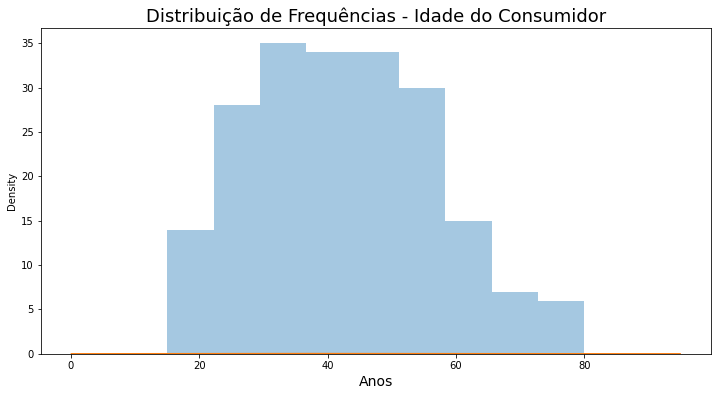

In [ ]:
ax = sns.distplot(dados.idade, kde = False)
ax = sns.distplot(dados.idade)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Idade do Consumidor', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

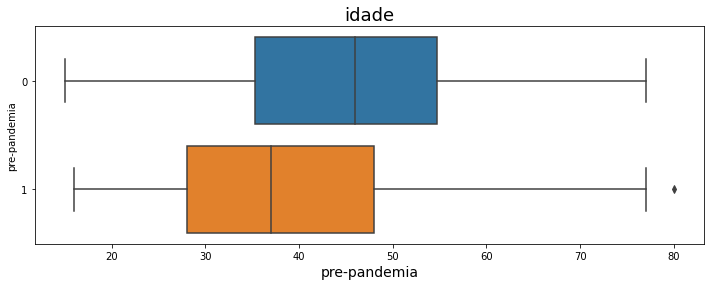

In [ ]:
ax = sns.boxplot( x = 'idade', y = 'pre-pandemia', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('idade', fontsize=18)
ax.set_xlabel('pre-pandemia', fontsize=14)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


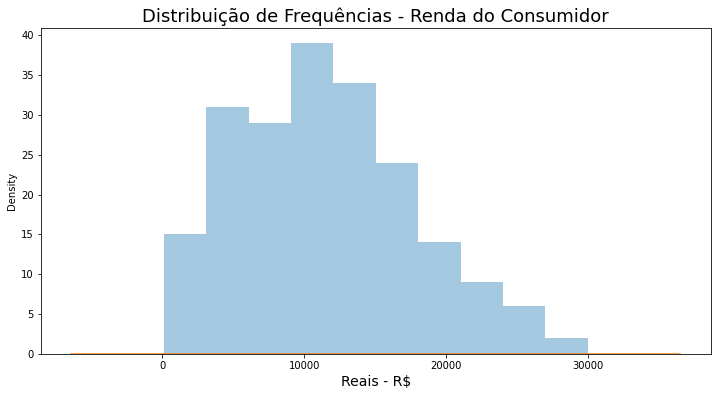

In [ ]:
ax = sns.distplot(dados.renda, kde = False)
ax = sns.distplot(dados.renda)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Renda do Consumidor', fontsize=18)
ax.set_xlabel('Reais - R$', fontsize=14)
ax

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


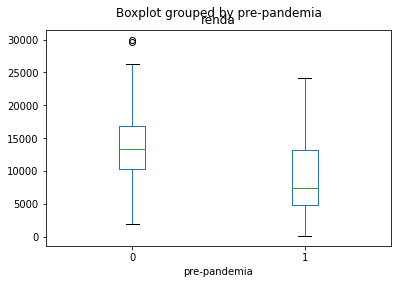

In [ ]:
dados.boxplot(by ='pre-pandemia', column =['renda'], grid = False)

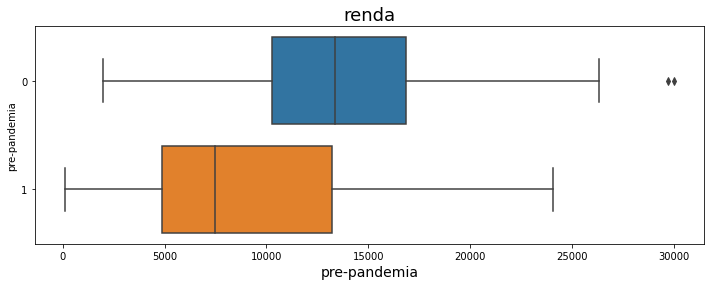

In [ ]:
ax = sns.boxplot( x = 'renda', y = 'pre-pandemia', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('renda', fontsize=18)
ax.set_xlabel('pre-pandemia', fontsize=14)
ax

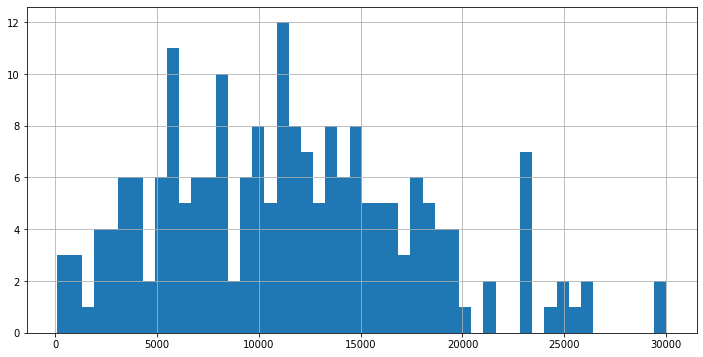

In [ ]:
dados.renda.hist(bins = 50, figsize=(12,6))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


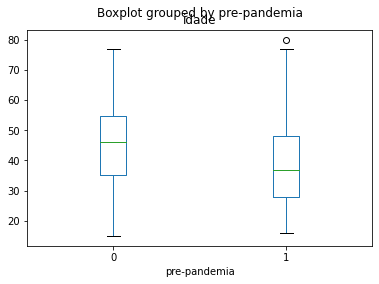

In [ ]:
dados.boxplot(by ='pre-pandemia', column =['idade'], grid = False)

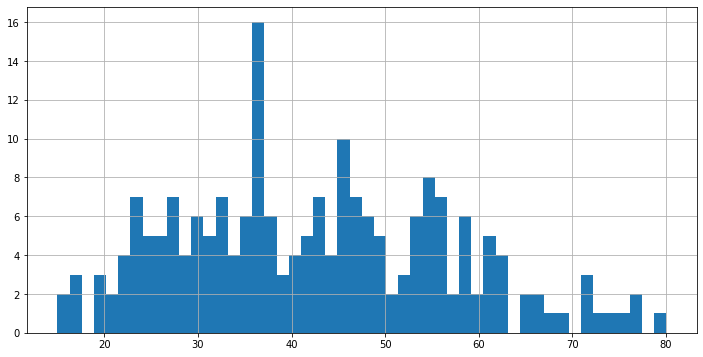

In [ ]:
dados.idade.hist(bins = 50, figsize=(12,6))

# Plotando gráfico para análise dos produtos vendidos na não pré-pandemia

In [ ]:
frequencia_nao_pre_pandemia_produtos = dados_produtos_nao_pre_pandemia['Produto'].value_counts()
percentual_nao_pre_pandemia_produtos = dados_produtos_nao_pre_pandemia['Produto'].value_counts(normalize = True) * 100
dist_freq_nao_pre_pandemia_produtos = pd.DataFrame({'Frequência': frequencia_nao_pre_pandemia_produtos, 'Porcentagem (%)': percentual_nao_pre_pandemia_produtos})
dist_freq_nao_pre_pandemia_produtos

,Frequência,Porcentagem (%)
desodorante,46,45.098039
antissinais,20,19.607843
batom,15,14.705882
sombra,9,8.823529
perfume,8,7.843137
base,4,3.921569


In [ ]:
dist_freq_nao_pre_pandemia_produtos['Frequência'].plot.bar(color = 'orangered', alpha = 0.4, figsize=(12, 6))


# Faixa etária da idade dos clientes não pré-pandemia

In [ ]:
print('De %s até %s anos' % (dados_nao_pre_pandemia['Idade'].min(), dados_nao_pre_pandemia['Idade'].max()))

De 15 até 77 anos


# Gráfico da idade dos clientes não pré-pandemia

In [ ]:
ax = sns.distplot(dados_nao_pre_pandemia['Idade'], kde = True, bins=50, color='magenta')
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Anos', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


# Faixa da renda dos clientes não pré-pandemia

In [ ]:
print('De R$:%s,00 até R$:%s,00' % (dados_nao_pre_pandemia['Renda'].min(), dados_nao_pre_pandemia['Renda'].max()))

De R$:1995,00 até R$:30000,00


# Gráfico da renda dos clientes não pré-pandemia

In [ ]:
ay = sns.distplot(dados_nao_pre_pandemia['Renda'], kde = True, bins=50, color='green')
ay.figure.set_size_inches(12, 6)
ay.set_title('Distribuição de Frequências - Reais', fontsize=18)
ay.set_xlabel('Reais', fontsize=14)
ay

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


### Suponha agora que os dados recebidos são somente uma amostra da sua população total de clientes. Suponha que a sua "população" de clientes verdadeira é de 100000. Qual o tamanho da amostra necessária para chegarmos a conclusões com 95% de confiança e 2% de margem de erro? A base informada é suficiente? E com uma margem de erro de 10%?

In [ ]:
from scipy.stats import norm

In [ ]:
media_amostra = dados.mean()
desvio_padrao_amostra = dados.std()
e = 0.2 * media_amostra
x = 0.5 + (0.95 / 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
z = norm.ppf(x)
n_confianca_95 = (z * (desvio_padrao_amostra / e)) ** 2
print('Para um nível de confiança de 95%% devemos selecionar uma amostra de\n%s elementos.' %n_confianca_95)

Para um nível de confiança de 95% devemos selecionar uma amostra de
idade           11.076227
renda           28.285847
pre-pandemia    97.467462
dtype: float64 elementos.


In [ ]:
e_2 = 0.10 * media_amostra
x_2 = 0.5 + (0.95 / 2)
z_2 = norm.ppf(x_2)
n_confianca_95_2 = (z_2 * (desvio_padrao_amostra / e_2)) ** 2
print('Para um nível de confiança de 95%% devemos selecionar uma amostra de\n%s elementos.' %n_confianca_95_2)

Para um nível de confiança de 95% devemos selecionar uma amostra de
idade            44.304906
renda           113.143388
pre-pandemia    389.869848
dtype: float64 elementos.
